<a href="https://colab.research.google.com/github/JoelByron/AI_Camp_TalentoTech/blob/main/notebooks/03_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REGRESION LINEAL**

Regresión Líneal Simple

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

DATAX = [1, 2, 2, 3, 4, 4, 5, 6]
DATAY = [2, 3, 4, 4, 4, 6, 5, 7]

data_dict = {'X': DATAX, 'Y': DATAY}
dfData = pd.DataFrame(data_dict)
dfInfo = dfData.copy()

dfInfo

,X,Y
0,1,2
1,2,3
2,2,4
3,3,4
4,4,4
5,4,6
6,5,5
7,6,7


In [2]:
dfInfo['XY'] = dfInfo['X'] * dfInfo['Y']
dfInfo['X2'] = dfInfo['X'] ** 2

dfInfo

,X,Y,XY,X2
0,1,2,2,1
1,2,3,6,4
2,2,4,8,4
3,3,4,12,9
4,4,4,16,16
5,4,6,24,16
6,5,5,25,25
7,6,7,42,36


In [3]:
sumX = dfInfo['X'].sum()
sumY = dfInfo['Y'].sum()
sumXY = dfInfo['XY'].sum()
sumX2 = dfInfo['X2'].sum()


print(sumX)
print(sumY)
print(sumXY)
print(sumX2)

27
35
135
111


In [4]:
div=( len(dfInfo) * sumXY ) - ( sumX * sumY )
divi=( len(dfInfo) * sumX2 ) - ( sumX ** 2 )

m = div / divi

print(m)

0.8490566037735849


In [5]:
b = ( sumY / len(dfInfo) ) - ( m * ( sumX / len(dfInfo) ) )

print(b)

1.5094339622641506


In [6]:
dfInfo['Y_pred'] = m * dfInfo['X'] + b

dfInfo

,X,Y,XY,X2,Y_pred
0,1,2,2,1,2.358491
1,2,3,6,4,3.207547
2,2,4,8,4,3.207547
3,3,4,12,9,4.056604
4,4,4,16,16,4.905660
5,4,6,24,16,4.905660
6,5,5,25,25,5.754717
7,6,7,42,36,6.603774


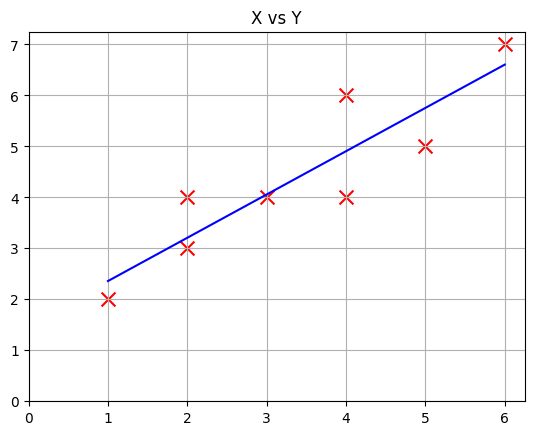

In [7]:
plt.figure() #Creamos el espacio de la figura

plt.scatter(dfInfo['X'], dfInfo['Y'], color='red', marker='x', s=100) #Graficamos los datos
plt.plot(dfInfo['X'], dfInfo['Y_pred'], color='blue')

plt.xlim(left=0)
plt.ylim(bottom=0)
plt.grid(True)
plt.title('X vs Y')
plt.show()

(50, 1)
(50,)


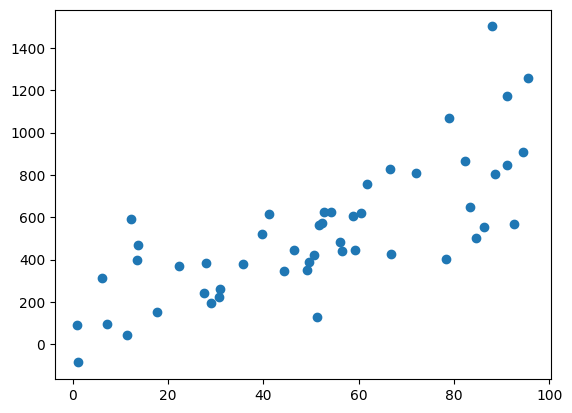

In [10]:
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

def generador_datos_simple(beta, muestras, desviacion):
# Genero n (muestras) valores de x aleatorios entre 0 y 100
  x = np.random.random(muestras) * 100
# Genero un error aleatorio gaussiano con desviación típica (desviacion)
  e = np.random.randn(muestras) * desviacion
# Obtengo el y real como x*beta + error
  y = x * beta + e
  #return x.reshape((-1,1)), y.reshape((-1,1))
  return x.reshape((-1,1)), y

  # Parámetros de la distribución
desviacion = 200
beta = 10
muestras = 50
x, y = generador_datos_simple(beta, muestras, desviacion)
print(x.shape)
print(y.shape)

# Represento los datos generados
plt.scatter(x, y)

# **Regresión Líneal Multiple**

In [11]:
def generador_datos_multiple(coeficientes, muestras, std_dev):
 """

 Args:
   coeficientes:
   muestras:
   std_dev:

 Returns:

 """
# Calculamos el número de predictores y creamos una matriz
# con los coeficientes con p filas y 1 columna para
# multiplicación de matrices
 n_coeficientes = len(coeficientes)
 #print(n_coeficientes)
 coef_matriz = np.array(coeficientes).reshape(n_coeficientes, 1)
# Igual que en el caso de regresión lineal simple
 x = np.random.random_sample((muestras, n_coeficientes)) * 100
# Genero un error aleatorio gaussiano con desviación típica (std_dev)
 epsilon = np.random.randn(muestras) * std_dev
 #print(epsilon)
# Como x es una matriz muestras x n_coeficientes, y
# coef_matriz es n_coeficientes x 1
# Podemos hacer multiplicación de matrices para obtener y
# dados x1,x2,...,xn necesitamos hacer la transpuesta
# para obtener un array 1xmuestras en lugar de muestrasx1 para
# usar la regresión
 y = np.matmul(x, coef_matriz).transpose() + epsilon
 return x, y

In [12]:
# Genero los datos que ajustaré con la recta
coeficientes_reales =[10, 5]
muestras = 200
std_dev = 100
X, Y = generador_datos_multiple(coeficientes_reales, muestras, std_dev)

In [13]:
# Creo un modelo de regresión lineal
model = linear_model.LinearRegression()

# Entreno el modelo con los datos (X,Y)
model.fit(X, Y.transpose())
# Ahora puedo obtener el coeficiente b_1
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

# Podemos predecir usando el modelo
y_pred = model.predict(X)

Coefficients: [[10.04360108  4.50168734]]
Intercept: [22.14843886]


Text(0, 0.5, 'X')

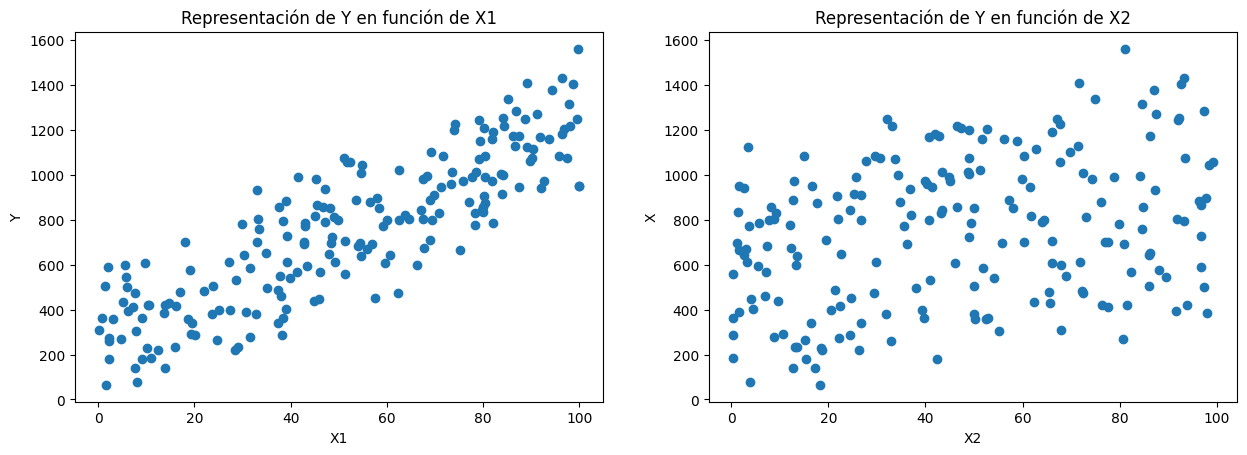

In [14]:
f, [p1, p2] = plt.subplots(1,2)
f.set_figwidth(15)

# Represento los puntos para la variable X1 y para Y
p1.scatter(X[:,0], Y)
p1.set_title('Representación de Y en función de X1')
p1.set_xlabel('X1')
p1.set_ylabel('Y')

p2.scatter(X[:,1], Y)
p2.set_title('Representación de Y en función de X2')
p2.set_xlabel('X2')
p2.set_ylabel('X')

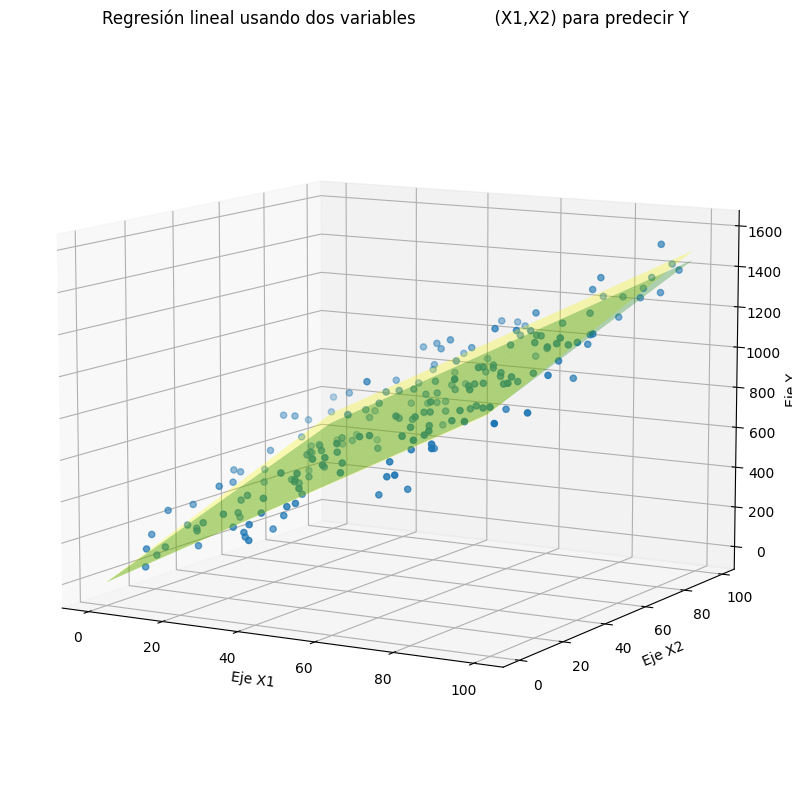

In [15]:
# Represento la superficie que ajusta mejor a los datos
fig = plt.figure(figsize=(15,10))
p3 = fig.add_subplot(111, projection='3d') # Use add_subplot to create a subplot with the desired projection
x1, x2 = np.meshgrid(range(100), range(100))
# Superficie que se obtiene con la regresión lineal múltiple
z_modelo = model.coef_[0][0]*x1 + model.coef_[0][1]*x2
# Superficie real de los datos
z_real = coeficientes_reales[0]*x1 + coeficientes_reales[1]*x2
# Represento ambas superficies
p3.plot_surface(x1, x2, z_modelo, alpha=0.3, color='green')
p3.plot_surface(x1, x2, z_real, alpha=0.3, color='yellow')
# Represento también los datos para ver el ajuste
p3.scatter(X[:,0], X[:,1], Y)
p3.set_title(u'Regresión lineal usando dos variables \
              (X1,X2) para predecir Y')
p3.set_xlabel('Eje X1')
p3.set_ylabel('Eje X2')
p3.set_zlabel('Eje Y')
p3.view_init(10, )
plt.show()

**REGRESIÓN MULTIPLE LIENAL**
clase 01/10/2024

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Y = [78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 115.9, 83.8, 11.3, 109.4]
X1 = [7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10]
X2 = [26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68]
X3 = [6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8]
X4 = [60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12]

data = {'Y': Y,
        'X1': X1,
        'X2': X2,
        'X3': X3,
        'X4': X4}

df = pd.DataFrame(data)

X = df[['X1','X2','X3','X4']].values
Y = df['Y'].values

ones = np.ones((X.shape[0],1))

X = np.hstack([ones,X])

Xtras = X.T

XTX = np.dot(Xtras,X)

XTXPinv = np.linalg.pinv(XTX)


Be= XTXPinv.dot(Xtras).dot(Y)

print(Be)

[838.2673512   -6.65969873  -7.82551556  -7.77107085  -7.75702105]


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [19]:
#X = np.array([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = X**2 - 2*X + 3  # polinomio con los datos (cuadrado)

poly_regressor = PolynomialFeatures(degree=2)
poly_features = poly_regressor.fit_transform(X.reshape(-1,1))

print(poly_regressor.get_feature_names_out())

print(poly_features)

model = LinearRegression()
model.fit(poly_features, y)

y_pred = model.predict(poly_features)

print(model.coef_)
print(model.intercept_)

['1' 'x0' 'x0^2']
[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]
[ 0. -2.  1.]
2.9999999999999893


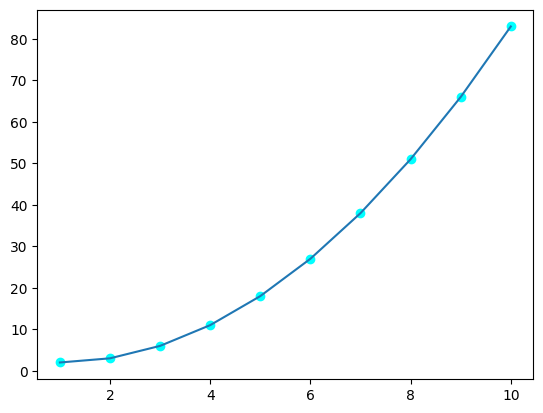

In [20]:
plt.scatter(X, y, c='cyan')
plt.plot(X, y_pred)

EJEMPLO **2**

In [21]:
X = np.linspace(0,8,500) # datos en X
y = 0.125*X**3 - X**2 + 0.5*X + 3 # polinomio con los datos (cúbico)
y2 = np.random.normal(0,0.50,500) + y

Text(0.5, 1.0, 'Dataset generado')

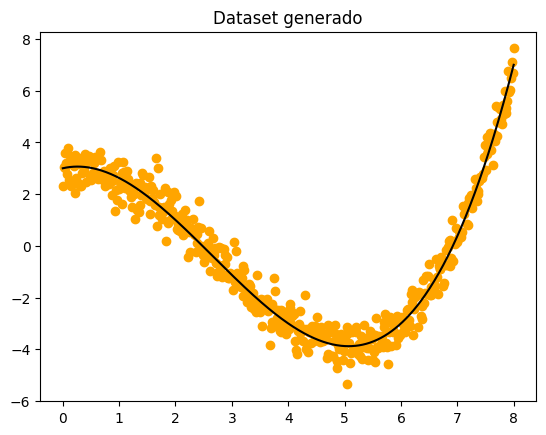

In [22]:
plt.scatter(X, y2, c='orange' )
plt.plot(X, y, c="black") # graficar los datos
plt.title("Dataset generado")

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_regressor = PolynomialFeatures(degree=3)
poly_features = poly_regressor.fit_transform(X.reshape(-1,1))

print(poly_features)

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.60320641e-02 2.57027080e-04 4.12067463e-06]
 [1.00000000e+00 3.20641283e-02 1.02810832e-03 3.29653971e-05]
 ...
 [1.00000000e+00 7.96793587e+00 6.34880021e+01 5.05868329e+02]
 [1.00000000e+00 7.98396794e+00 6.37437440e+01 5.08928008e+02]
 [1.00000000e+00 8.00000000e+00 6.40000000e+01 5.12000000e+02]]


In [24]:
print(poly_regressor.get_feature_names_out())

['1' 'x0' 'x0^2' 'x0^3']


In [25]:
model = LinearRegression()
model.fit(poly_features, y)

y_pred = model.predict(poly_features)

print(model.coef_)
print(model.intercept_)

[ 0.     0.5   -1.     0.125]
2.9999999999999902


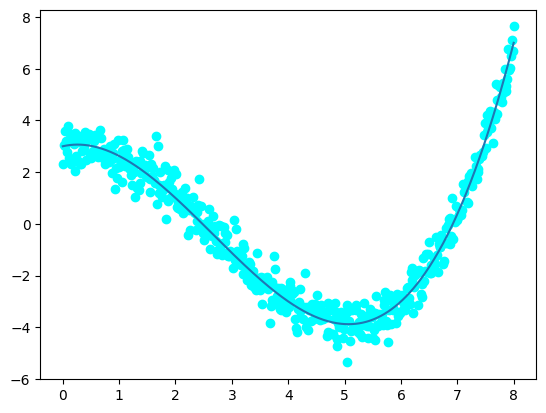

In [26]:
plt.scatter(X, y2, c='cyan')
plt.plot(X, y_pred)

# **TAREA DATAFRAME REGRESIÓN LINEAL MULTIPLE.**

Crear Dataframe con columnas X1, X2, Y.

Crear 20 filas minimo

Graficar X1 Vs Y, X2 Vs Y.

Realizar Regresión Lineal Multiple.

Hallar coeficientes e interceptos.

Imprimir en pantalla la ecuación de resultado

In [29]:
# Crear datos aleatorios para x1, x2 y y utilizando numpy
n = 20  # Número de filas

x1 = np.random.random(n) * 100
x2 = np.random.random(n) * 100


# Crear el DataFrame
data = {
    "x1": x1,
    "x2": x2
}

df = pd.DataFrame(data)

df

,x1,x2
0,54.641142,81.490984
1,23.026666,19.545825
2,83.657868,16.248597
3,22.517195,21.660348
4,87.854332,64.555128
5,22.996927,1.191644
6,35.273385,8.820258
7,38.762794,73.577820
8,41.466822,23.132188
9,67.110350,82.764584


In [32]:
df = pd.DataFrame(data)

df ["y"] = df["x1"]*10 + df["x2"]*5 + np.random.randn(n) * 10


In [30]:
# Graficar x1 vs y y x2 vs y
plt.figure(figsize=(14, 6))


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

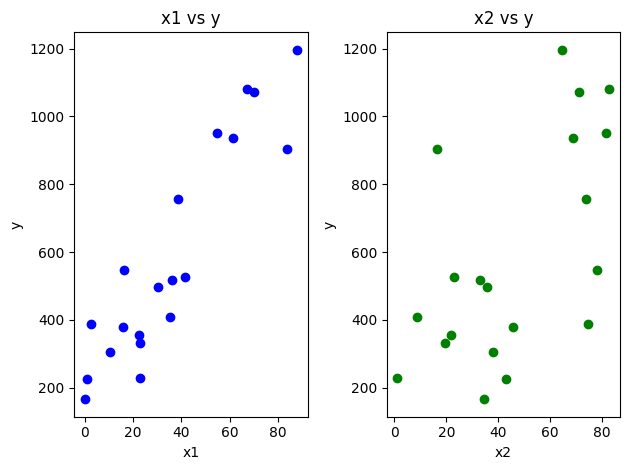

In [33]:
# Gráfico x1 vs y
plt.subplot(1, 2, 1)
plt.scatter(df['x1'], df['y'], color='blue')
plt.title('x1 vs y')
plt.xlabel('x1')
plt.ylabel('y')

# Gráfico x2 vs y
plt.subplot(1, 2, 2)
plt.scatter(df['x2'], df['y'], color='green')
plt.title('x2 vs y')
plt.xlabel('x2')
plt.ylabel('y')

plt.tight_layout()
plt.show()

In [35]:

# regresión lineal múltiple
X = df[['x1', 'x2']]  # Variables independientes
Y = df['y']  # Variable dependiente

model = LinearRegression()
model.fit(X, Y)

# Obtener los coeficientes y el intercepto
coeficientes = model.coef_
intercepto = model.intercept_

# Imprimir la ecuación de la regresión
print(intercepto)
print(coeficientes)

print(f"y = {model.coef_[0]} x1 + {model.coef_[1]} x2 + {model.intercept_}")

4.983042336798803
[9.94414332 4.93032776]
y = 9.944143319317336 x1 + 4.930327755511084 x2 + 4.983042336798803
